
# The structure of this jupyter notebook:
1. Load model
2. Solve model
3. Simulate model
4. Plot model results 

    i. Average over age

    ii. All simulation over age

    iii. Solutions for each grid point over age (2D)
    
    iV. solutions for specific grid points in 3D

5. Welfare analysis
     
    i. Replacement rate

    ii. Consumption replacement rate

    iii. Consumption equivalence

# Load model 

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from WelfareMeasures import *
from functions_njit import tax_rate_fct
from bernoulli_distribution import Bernoulli
from help_functions_non_njit import *
from graph_format import *
# load local model file and initialize model class
from model import ModelClass

In [2]:
model = ModelClass() # set a few number of periods.

par = model.par
sol = model.sol
sim = model.sim

In [3]:
np.where(
    (S := np.concatenate(([1.0], np.cumprod(par.pi[1:])))) > 0,
    np.cumsum(S[::-1])[::-1] / S,
    0.0
)


C:\Users\B224264\AppData\Local\Temp\ipykernel_19472\1353311897.py:3: RuntimeWarning: invalid value encountered in divide
  np.cumsum(S[::-1])[::-1] / S,


array([50.6578313 , 49.7056259 , 48.75350457, 47.80155279, 46.84986417,
       45.89854116, 44.94769575, 43.99745026, 43.04793819, 42.09930501,
       41.15170919, 40.20532305, 39.26033385, 38.31694476, 37.37537599,
       36.43586588, 35.49867201, 34.56407239, 33.63236655, 32.70387674,
       31.778949  , 30.85795426, 29.94128938, 29.02937803, 28.1226716 ,
       27.22164983, 26.32682139, 25.4387242 , 24.55792553, 23.68502187,
       22.82063838, 21.96542813, 21.12007083, 20.28527117, 19.46175664,
       18.65027493, 17.85159062, 17.06648141, 16.29573369, 15.54013746,
       14.80048067, 14.07754285, 13.3720882 , 12.68485801, 12.01656258,
       11.36787253, 10.73940972, 10.1317376 ,  9.54535119,  8.9806665 ,
        8.43800933,  7.91760322,  7.41955608,  6.94384465,  6.49029564,
        6.05856138,  5.64808661,  5.25806098,  4.88734817,  4.53437688,
        4.19696828,  3.87205644,  3.55522491,  3.23992043,  2.91608584,
        2.56771986,  2.16839583,  1.67277572,  1.        ,  0.  

In [34]:
for i in range(par.T):
    print(expected_life_left(i, par))

51.61004277277097
50.65783129951136
49.705625903494
48.75350457240604
47.80155278836374
46.849864170005745
45.898541158444154
44.947695748260486
43.99745026442069
43.04793818559194
42.09930501386253
41.15170919028698
40.205323054981534
39.260333849679846
38.316944759699666
37.37537599116648
36.435865878071645
35.4986720123032
34.56407238816459
33.6323665510891
32.703876738257435
31.778948996637105
30.857954261593072
29.941289376680896
29.0293780325527
28.122671600113865
27.221649830210037
26.326821389258615
25.438724197438788
24.557925533409723
23.685021867142737
22.820638380453676
21.965428133344023
21.120070833456253
20.285271165981477
19.46175664239159
18.650274928562048
17.851590616349572
17.066481407598918
16.295733685929708
15.540137459471282
14.800480666829195
14.077542848677474
13.372088197960247
12.684858011941945
12.016562578064502
11.367872531010692
10.739409718046288
10.131737600071274
9.545351191748278
8.980666498157806
8.438009326604542
7.9176032236894045
7.41955608349413

In [23]:
ret = 1

np.cumprod(par.pi[ret:])*np.arange(par.T, ret, -1)

array([6.99326913e+01, 6.88659561e+01, 6.77996807e+01, 6.67337400e+01,
       6.56679969e+01, 6.46023011e+01, 6.35364880e+01, 6.24703772e+01,
       6.14037715e+01, 6.03364553e+01, 5.92681933e+01, 5.81987288e+01,
       5.71277820e+01, 5.60550487e+01, 5.49801983e+01, 5.39028722e+01,
       5.28226821e+01, 5.17392085e+01, 5.06519988e+01, 4.95605664e+01,
       4.84643893e+01, 4.73629091e+01, 4.62555311e+01, 4.51416239e+01,
       4.40205206e+01, 4.28915206e+01, 4.17538923e+01, 4.06068777e+01,
       3.94496984e+01, 3.82815634e+01, 3.71016804e+01, 3.59092687e+01,
       3.47035768e+01, 3.34839032e+01, 3.22496227e+01, 3.10002173e+01,
       2.97353133e+01, 2.84547254e+01, 2.71585072e+01, 2.58470095e+01,
       2.45209459e+01, 2.31814651e+01, 2.18302300e+01, 2.04694998e+01,
       1.91022149e+01, 1.77320776e+01, 1.63636266e+01, 1.50022938e+01,
       1.36544389e+01, 1.23273473e+01, 1.10291824e+01, 9.76887720e+00,
       8.55595626e+00, 7.40027642e+00, 6.31168363e+00, 5.29958881e+00,
      

In [29]:
ret = 40

np.cumprod(par.pi[ret:])

array([0.98240981, 0.96307486, 0.94186133, 0.91863791, 0.89327988,
       0.86567417, 0.83572559, 0.80336407, 0.76855316, 0.73129947,
       0.69166281, 0.64976663, 0.60580818, 0.56006719, 0.51291229,
       0.46480343, 0.41628906, 0.36799642, 0.32061378, 0.2748641 ,
       0.23147025, 0.19111371, 0.15438949, 0.12176221, 0.09352868,
       0.06979304, 0.05045939, 0.03524474, 0.0237118 , 0.        ])

In [30]:
def expected_life_left(ret, par):
    surv_probs = par.pi[ret:]   # survival probs from ret to max age
    T = len(surv_probs)         # number of years after ret

    expected_years = 0.0
    cum_surv = 1.0

    for s in range(T):
        expected_years += cum_surv
        cum_surv *= surv_probs[s]  # update cumulative survival to next age

    return expected_years

In [33]:
expected_life_left(0, par)

np.float64(51.61004277277097)

In [39]:
expected_life_left = lambda ret, par: np.sum(np.cumprod(par.pi[ret:]))

expected_life_left(0,par)

np.float64(50.61004277277099)

In [22]:
np.arange(par.T, ret, -1)

array([70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54,
       53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37,
       36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20,
       19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,
        2])

In [17]:
np.cumprod(par.pi[ret:])

array([0.99903845, 0.99805734, 0.99705413, 0.99602597, 0.99496965,
       0.99388156, 0.99275762, 0.99159329, 0.99038341, 0.98912222,
       0.98780322, 0.98641913, 0.98496176, 0.98342191, 0.98178926,
       0.98005222, 0.97819782, 0.97621148, 0.9740769 , 0.97177581,
       0.96928779, 0.96658998, 0.9636569 , 0.96046008, 0.95696784,
       0.9531449 , 0.9489521 , 0.94434599, 0.93927853, 0.93369667,
       0.92754201, 0.92075048, 0.91325202, 0.90497036, 0.89582285,
       0.88572049, 0.87456804, 0.86226441, 0.84870335, 0.8337745 ,
       0.81736486, 0.79936087, 0.77965107, 0.75812962, 0.73470057,
       0.70928311, 0.68181777, 0.65227364, 0.62065631, 0.58701654,
       0.55145912, 0.51415143, 0.4753309 , 0.43531038, 0.39448023,
       0.35330592, 0.31231979, 0.27210599, 0.23327808, 0.19644958,
       0.16219884, 0.13103088, 0.10333999, 0.0793781 , 0.05923359,
       0.04282506, 0.02991233, 0.02012429, 0.        ])

In [25]:
for i in range(par.T):
    print(np.cumprod(par.pi[:i])*i)


[]
[0.99905664]
[1.99811328 1.99619199]
[2.99716992 2.99428798 2.99134743]
[3.99622656 3.99238398 3.98846323 3.98445419]
[4.9952832  4.99047997 4.98557904 4.98056774 4.9754318 ]
[5.99433985 5.98857597 5.98269485 5.97668129 5.97051816 5.96418622]
[6.99339649 6.98667196 6.97981066 6.97279483 6.96560452 6.95821725
 6.95060778]
[7.99245313 7.98476796 7.97692647 7.96890838 7.96069088 7.95224829
 7.94355175 7.93456878]
[8.99150977 8.98286395 8.97404228 8.96502193 8.95577724 8.94627932
 8.93649572 8.92638988 8.91592074]
[9.99056641 9.98095995 9.97115809 9.96113548 9.9508636  9.94031036
 9.92943968 9.91821098 9.9065786  9.89449124]
[10.98962305 10.97905594 10.9682739  10.95724902 10.94594995 10.9343414
 10.92238365 10.91003207 10.89723646 10.88394036 10.87008033]
[11.98867969 11.97715194 11.9653897  11.95336257 11.94103631 11.92837243
 11.91532762 11.90185317 11.88789432 11.87338949 11.85826945 11.84245643]
[12.98773633 12.97524793 12.96250551 12.94947612 12.93612267 12.92240347
 12.90827159 1

# Solve model

In [3]:
par.opt_tol = 1e-6
par.opt_maxiter = 1000

%time model.solve(do_print=False)

CPU times: total: 5min 50s
Wall time: 2min 57s



# Simulate model

In [4]:
%time model.simulate()

CPU times: total: 42.6 s
Wall time: 35.3 s


# Plot model results

In [5]:
time = np.arange(par.T)
data_dict = {
    "Human Capital (k)": {"data": model.sim.k[:], "unit": "%"},
    "Wages (w)": {"data": model.sim.w[:], "unit": "DKK"},
    "Hours Worked": {"data": np.where(model.sim.ex == 1, model.sim.h, np.nan), "unit": "hours"},
    "Assets (a)": {"data": model.sim.a[:], "unit": "DKK"},
    "Consumption (c)": {"data": model.sim.c[:], "unit": "DKK"},
    "Illiquid Savings (s)": {"data": model.sim.s[:], "unit": "DKK"},
    "Participation (ex)": {"data": model.sim.ex[:], "unit": "%"},
    "Tax Rate": {"data": np.where(model.sim.ex == 1, model.sim.tax_rate, np.nan), "unit": "%"},
    "After-tax Wages": {"data": (1 - model.sim.tax_rate[:,:]) * model.sim.w[:,:], "unit": "DKK"},
    "Early Retirement Rate": {"data":model.sim.e[:,:] == 2.0, "unit": "%"},
}


c:\Design_retirement\graph_format.py:102: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(data, axis=0).squeeze()
c:\Design_retirement\s_speciale\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1650: RuntimeWarning: All-NaN slice encountered
  return fnb._ureduce(a,


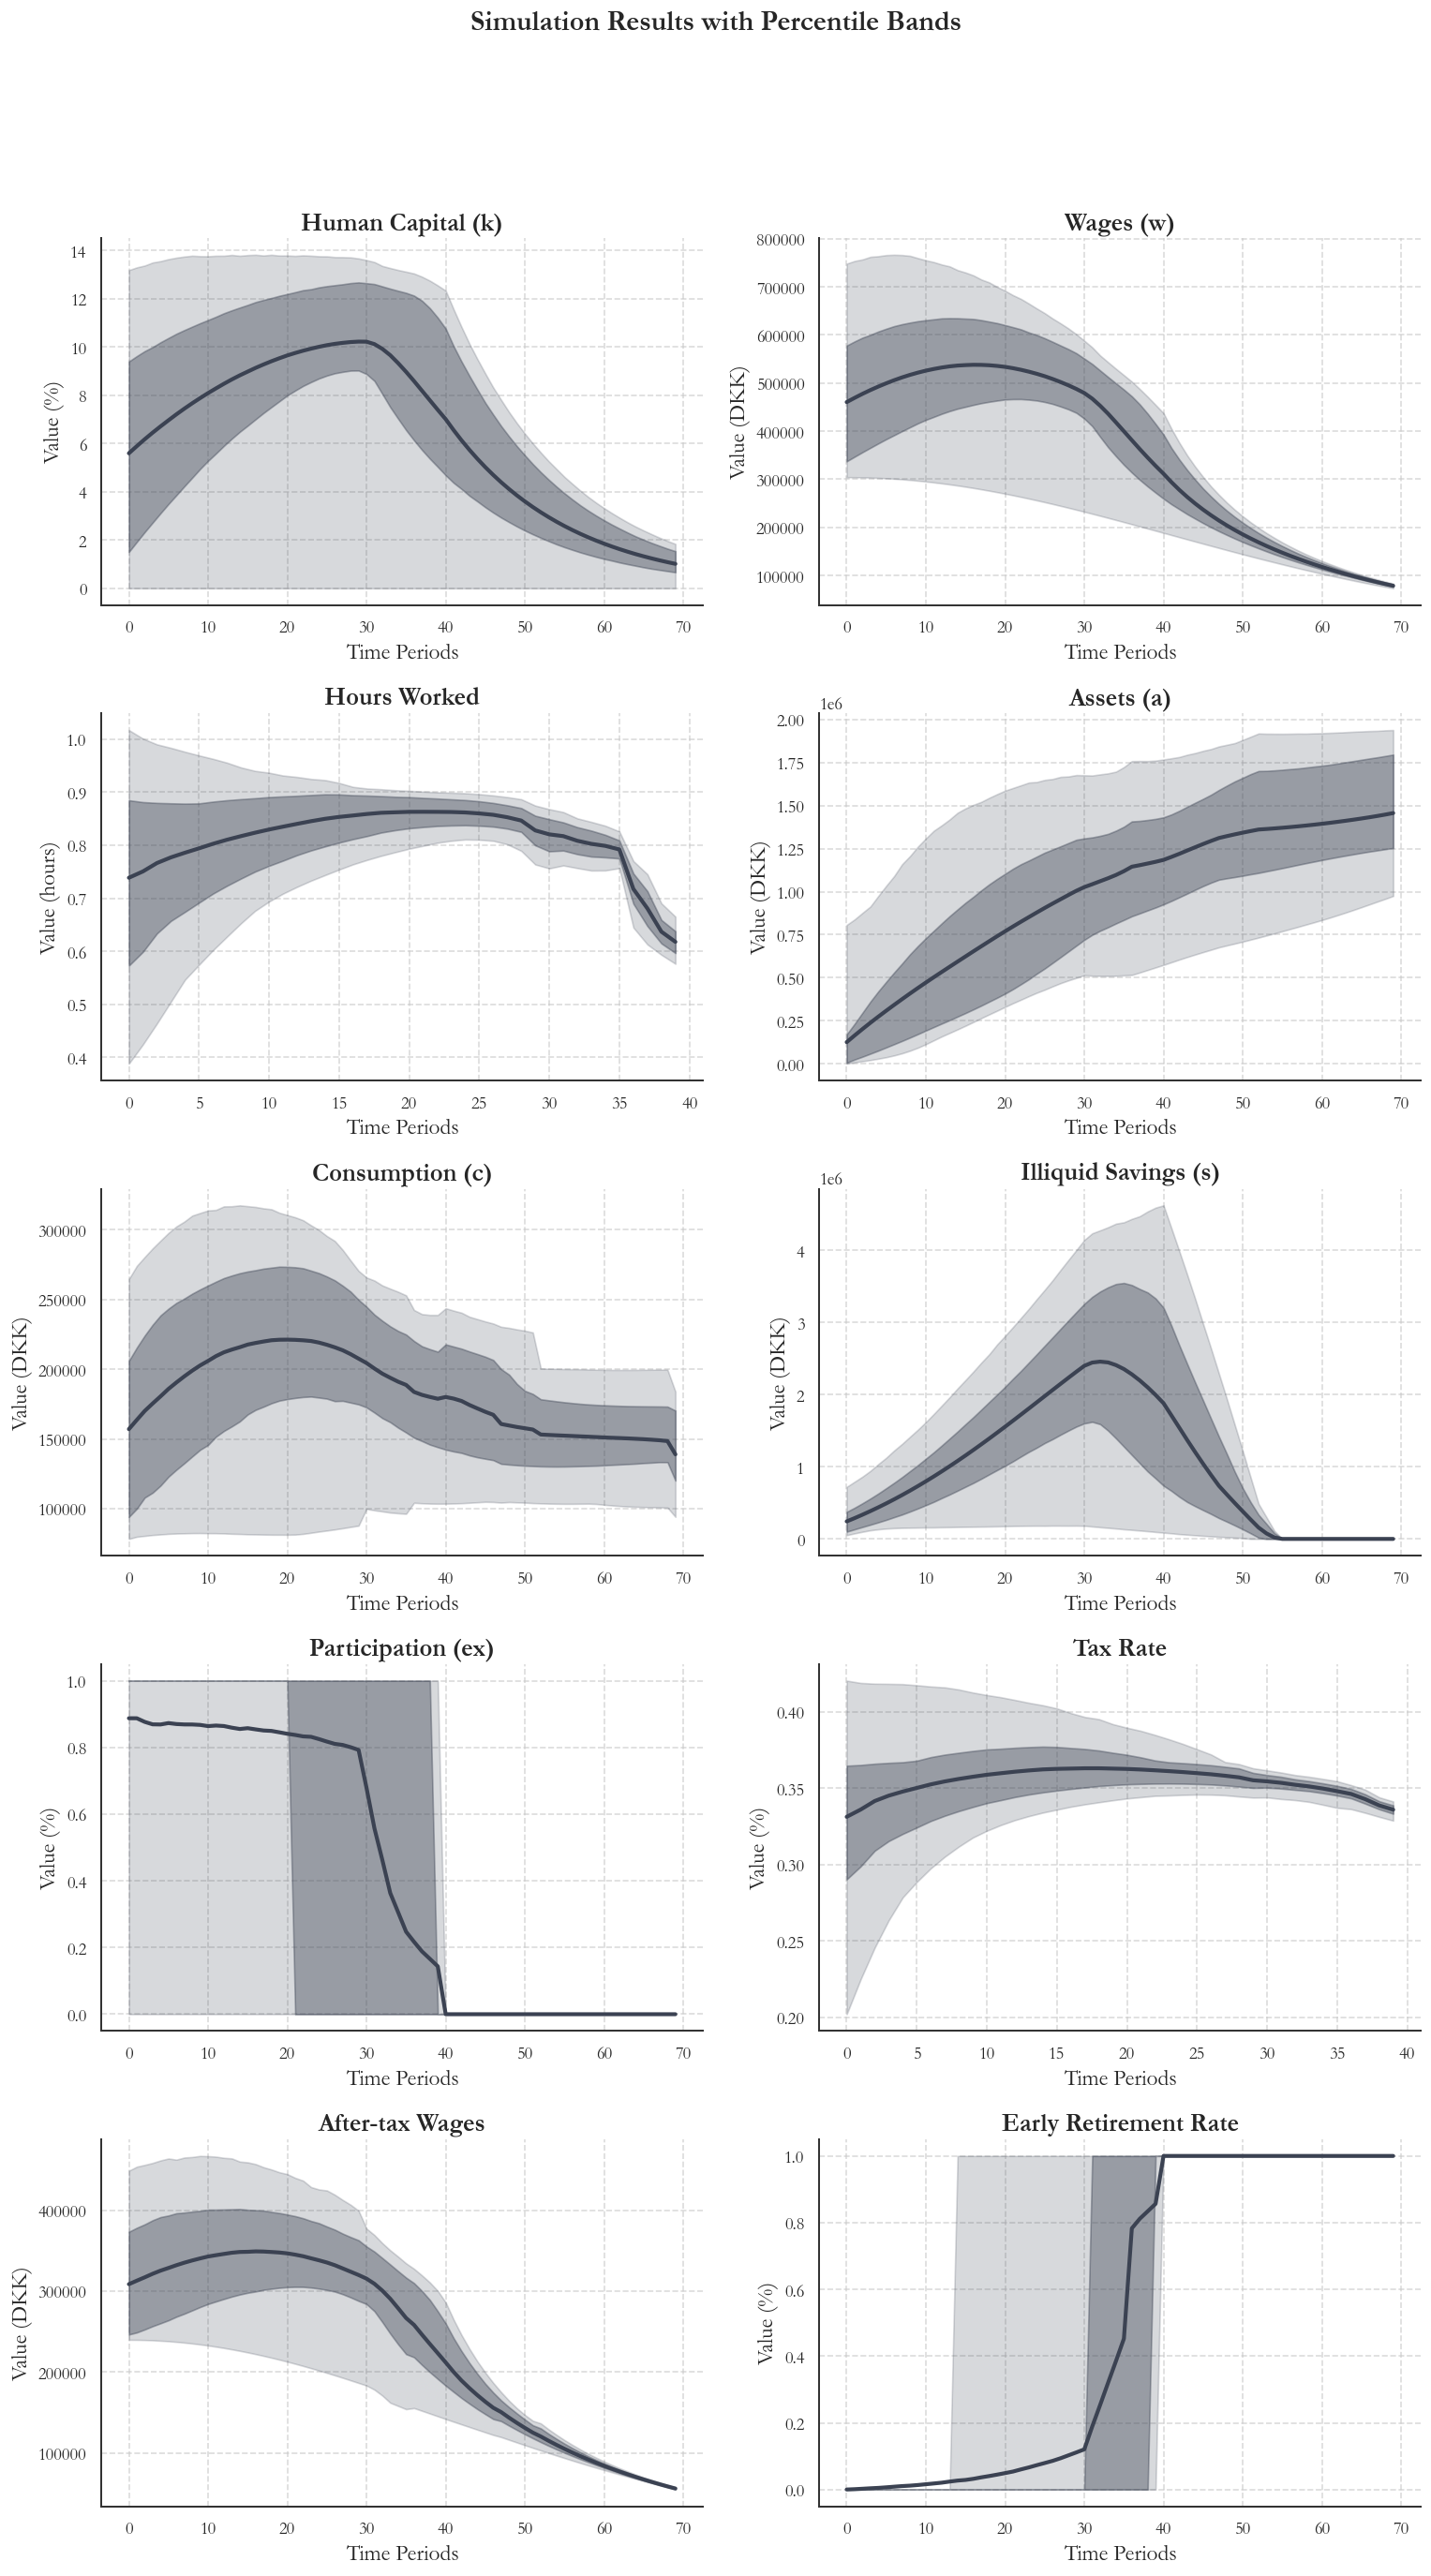

In [6]:
plot_simulation_grid_percentiles(
    data_dict=data_dict,
    time=np.arange(70),
    title="Simulation Results with Percentile Bands",
    ncols=2,
    save_title="baseline_simulation_percentiles_grid.png"
)

c:\Design_retirement\graph_format.py:161: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(data, axis=0).squeeze()
c:\Design_retirement\s_speciale\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:2053: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


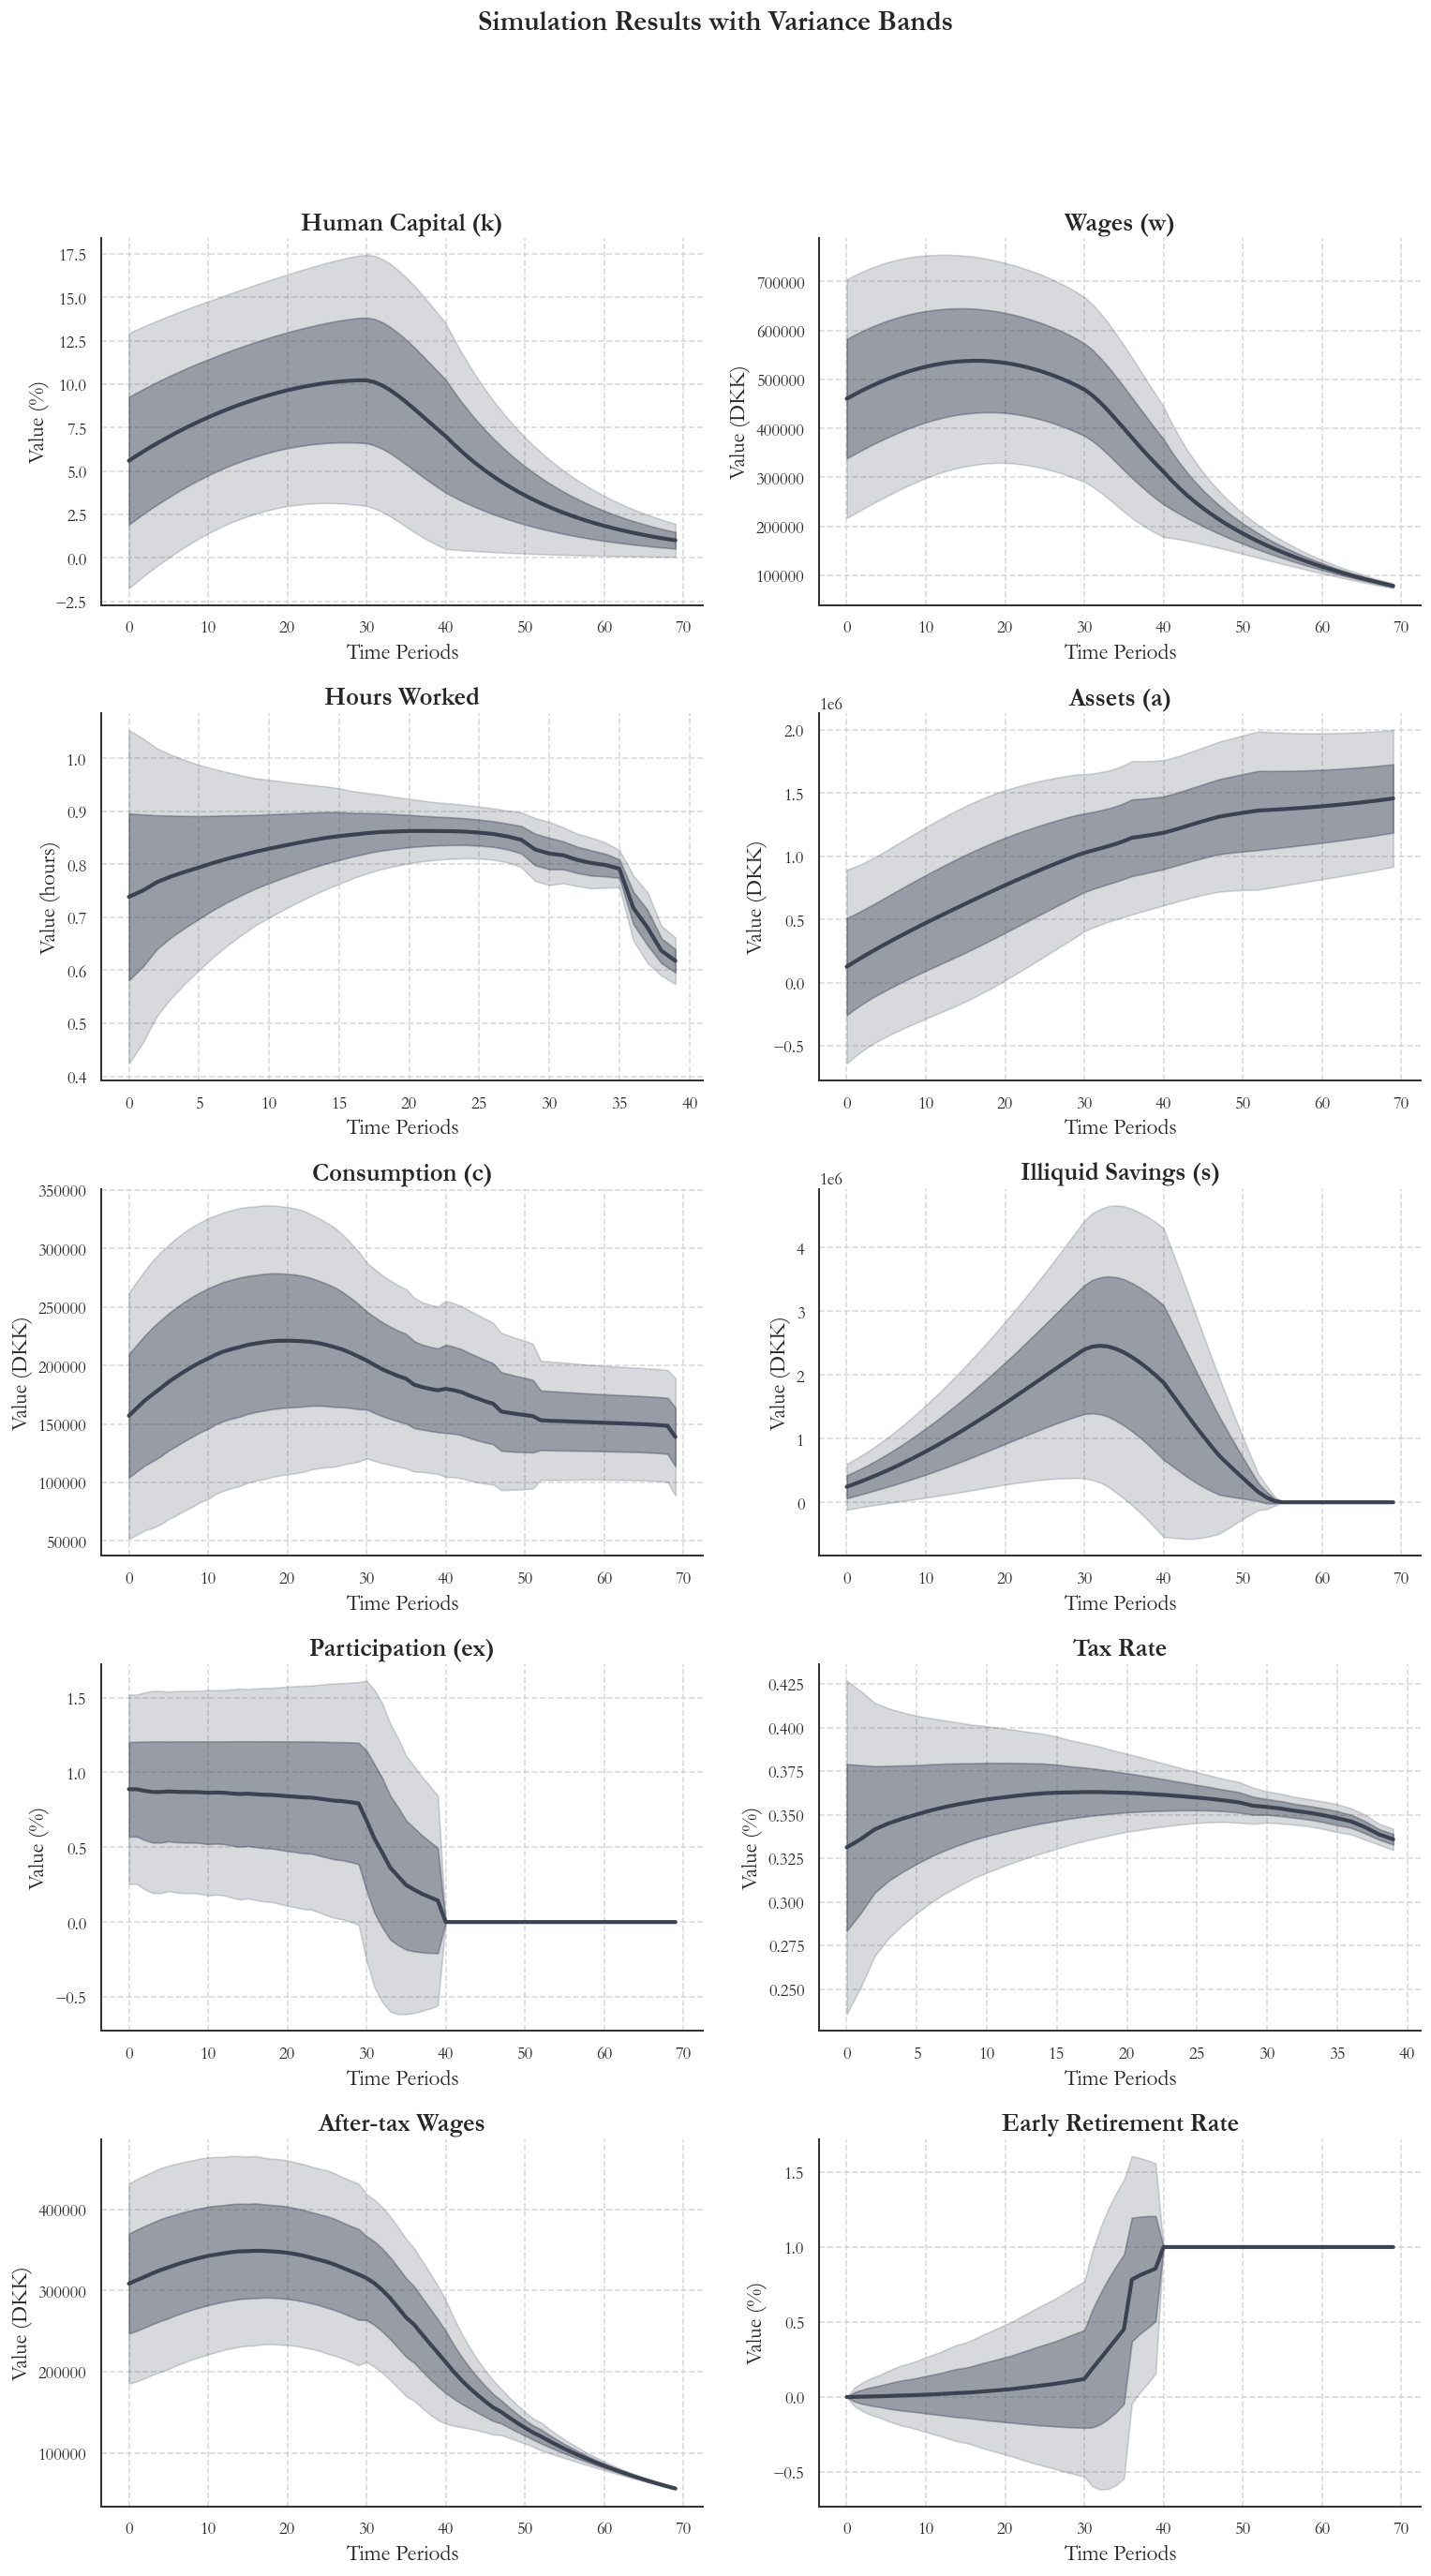

In [7]:
plot_simulation_grid_variance(
    data_dict=data_dict,
    time=np.arange(70),
    title="Simulation Results with Variance Bands",
    save_title="baseline_simulation_variance_grid.png"
)


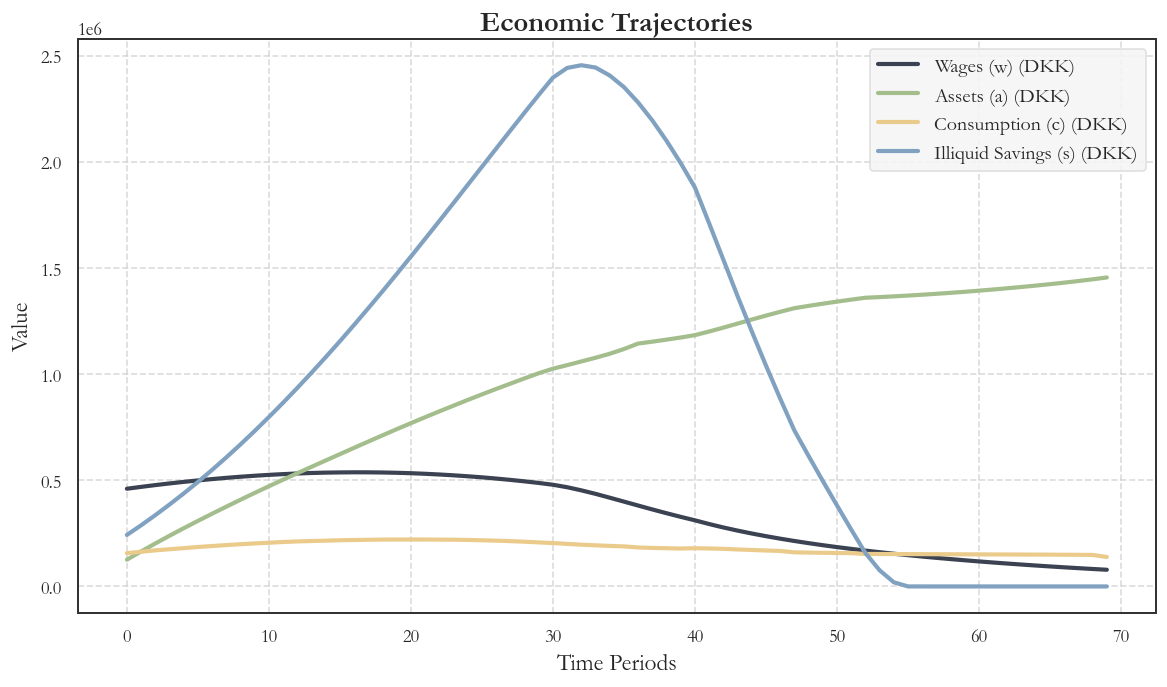

In [ ]:
data_dict_basic = {
    "Wages (w)": {"data": np.mean(model.sim.w[:], axis=0), "unit": "DKK"},
    "Assets (a)": {"data": np.mean(model.sim.a[:], axis=0), "unit": "DKK"},
    "Consumption (c)": {"data": np.mean(model.sim.c[:], axis=0), "unit": "DKK"},
    "Illiquid Savings (s)": {"data": np.mean(model.sim.s[:], axis=0), "unit": "DKK"},
}

plot_simulation_one_graph(data_dict_basic, time, title="Economic Trajectories",
    save_title="baseline_model_simpel.png")


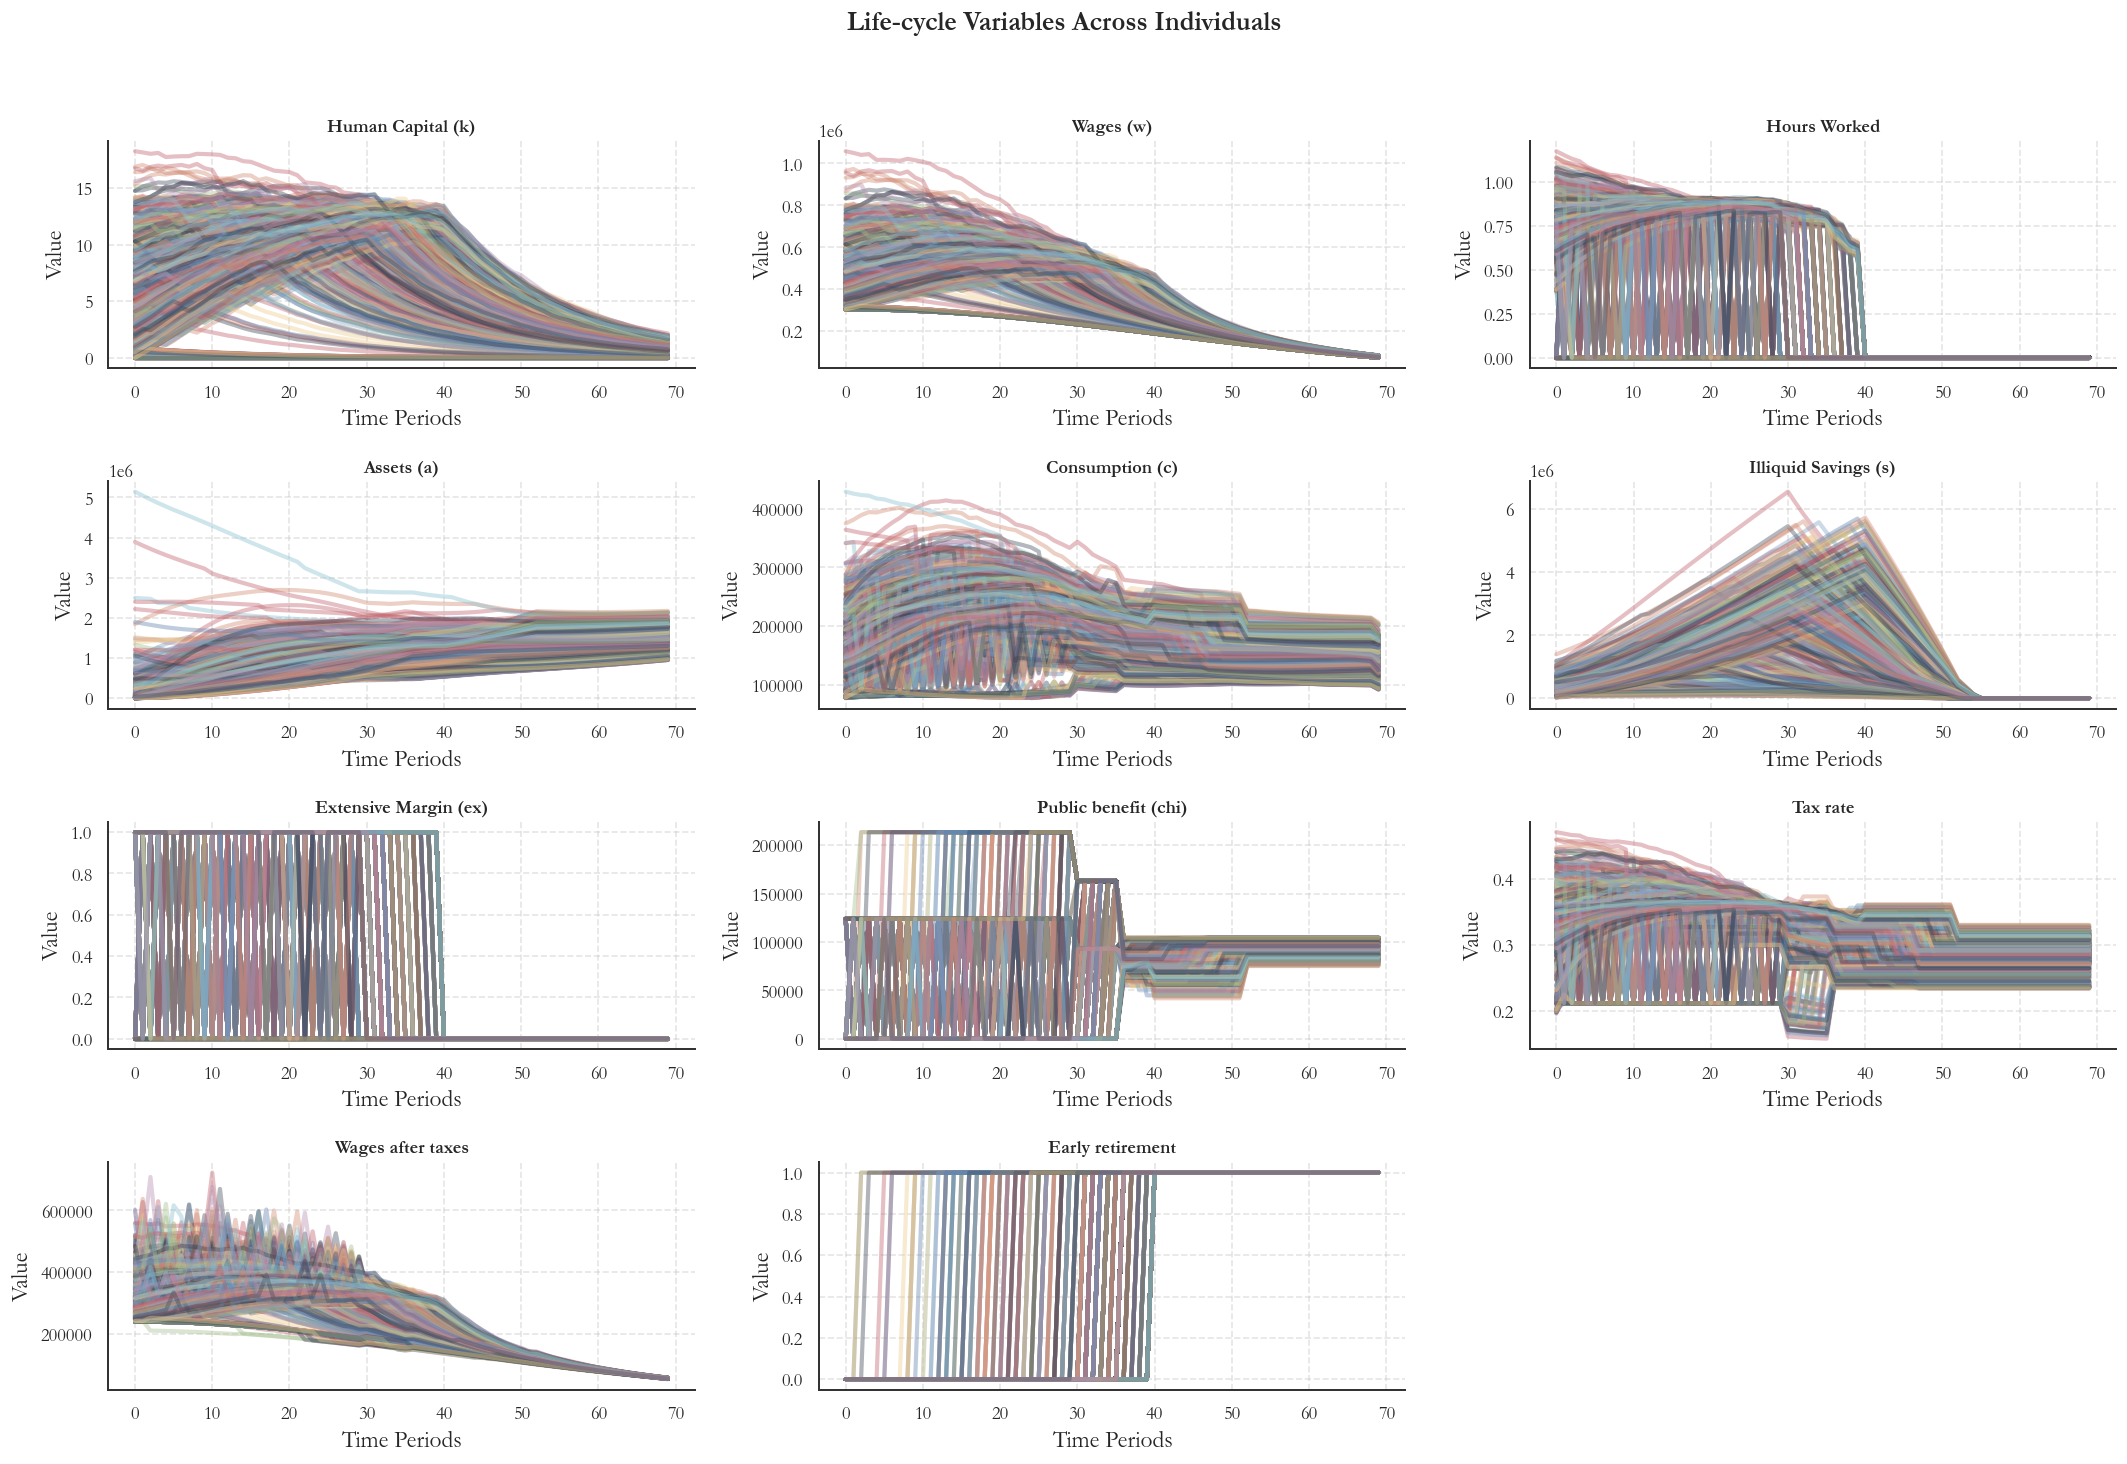

In [26]:
variables_dict = {
    "Human Capital (k)": lambda sim, i: sim.k[i, :par.T],
    "Wages (w)": lambda sim, i: sim.w[i, :par.T],
    "Hours Worked": lambda sim, i: sim.h[i, :par.T],
    "Assets (a)": lambda sim, i: sim.a[i, :par.T],
    "Consumption (c)": lambda sim, i: sim.c[i, :par.T],
    "Illiquid Savings (s)": lambda sim, i: sim.s[i, :par.T],
    "Extensive Margin (ex)": lambda sim, i: sim.ex[i, :par.T],
    "Public benefit (chi)": lambda sim, i: sim.chi_payment[i, :par.T],
    "Tax rate": lambda sim, i: sim.tax_rate[i, :par.T],
    "Wages after taxes": lambda sim, i: (1 - sim.tax_rate[i, :par.T]) * sim.w[i, :par.T],
    "Early retirement": lambda sim, i: sim.e[i, :par.T] == 2.0,
}

plot_variable_panels_over_individuals(sim=model.sim, par=par, variables_dict=variables_dict,
                                      title="Life-cycle Variables Across Individuals",
                                      ncols=3, max_i=1000,
    save_title="baseline_simulatin_individual.png")


In [27]:
np.max(model.sim.chi_payment[:,36:])

np.float64(104720.94120647579)

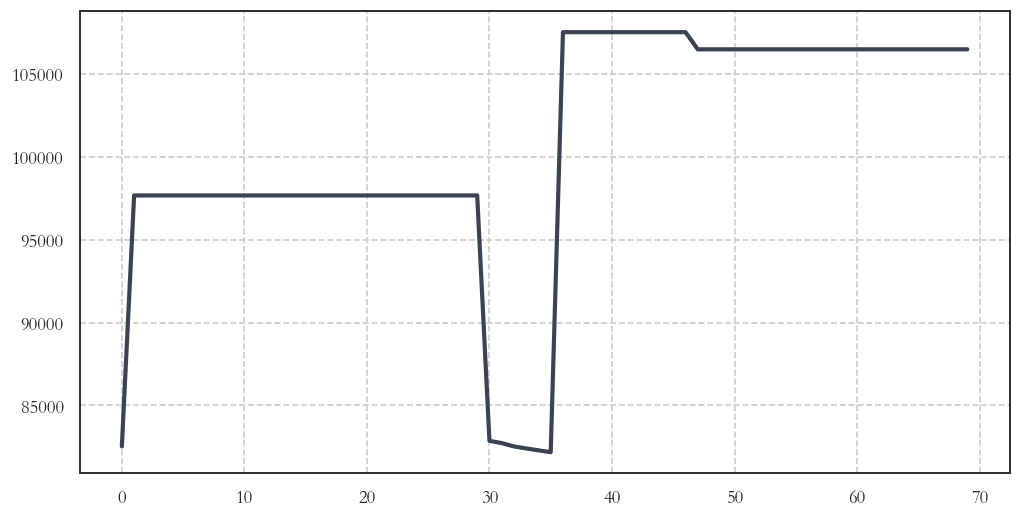

In [40]:
plt.plot(sim.income[3972,:])

In [39]:
sim.e[3972,:]

array([1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2.])

In [35]:
np.argmin(sim.s_retirement[:])

np.int64(3972)

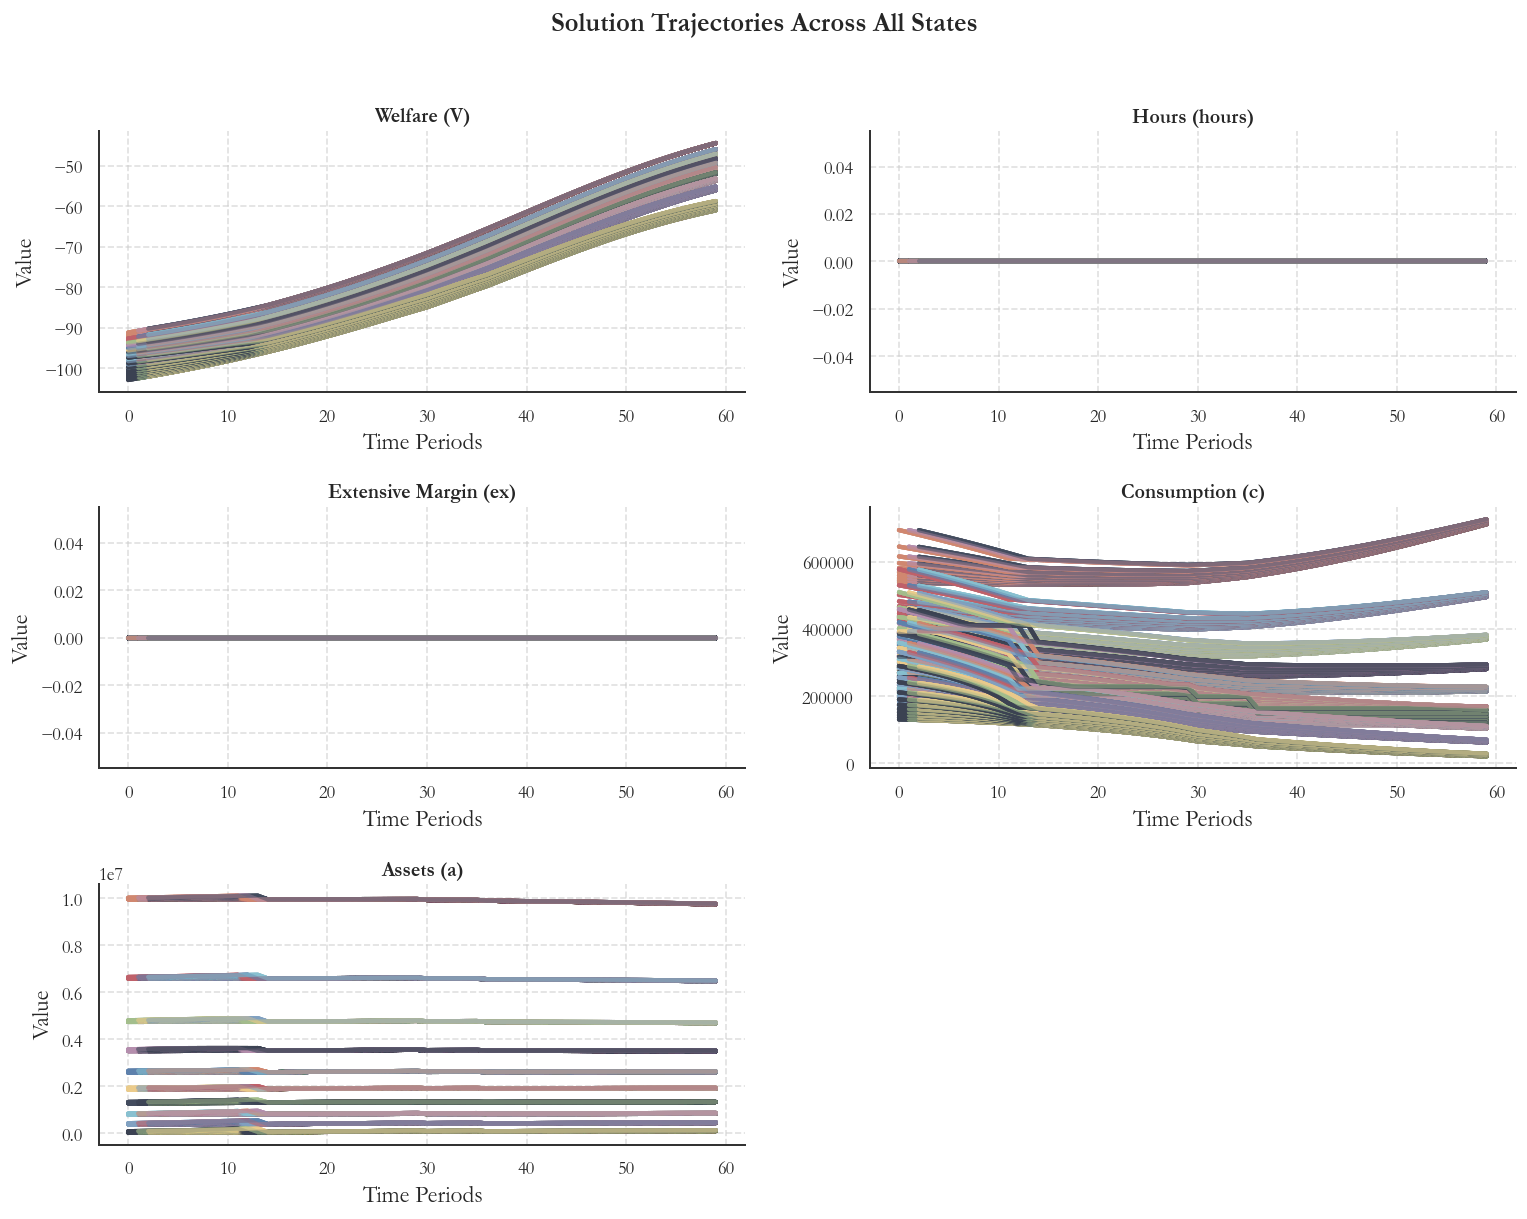

In [10]:
plot_all_solution_trajectories(model, par, t_end=60,
    save_title="baseline_solutions.png")


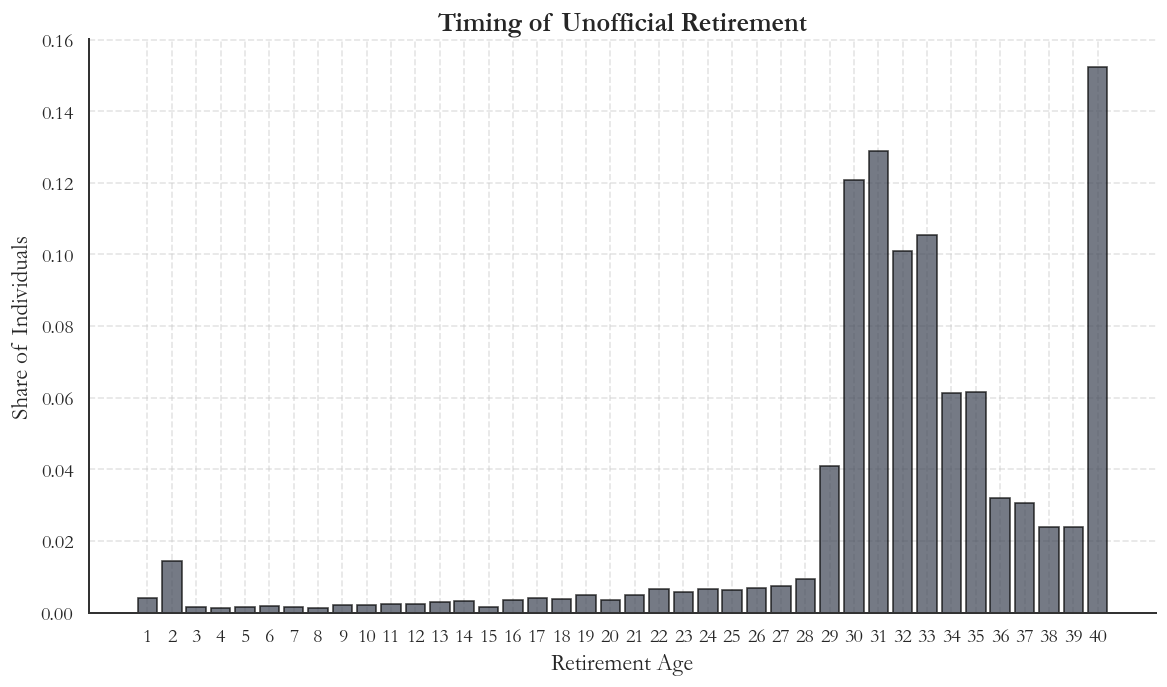

In [11]:
# 1. Find last time ex == 1 for each individual
last_working = np.full(sim.ex.shape[0], np.nan)  # initialize

for i in range(sim.ex.shape[0]):
    working = np.where(sim.ex[i, :] == 1)[0]  # find where ex=1
    if working.size > 0:
        last_working[i] = working[-1] + 1 # last time they worked (take last index)
plot_event_bar_series(
    values1=last_working,
    xlabel="Retirement Age",
    title="Timing of Unofficial Retirement",
    label1="Last Work",
    save_title="baseline_unofficial.png"
)


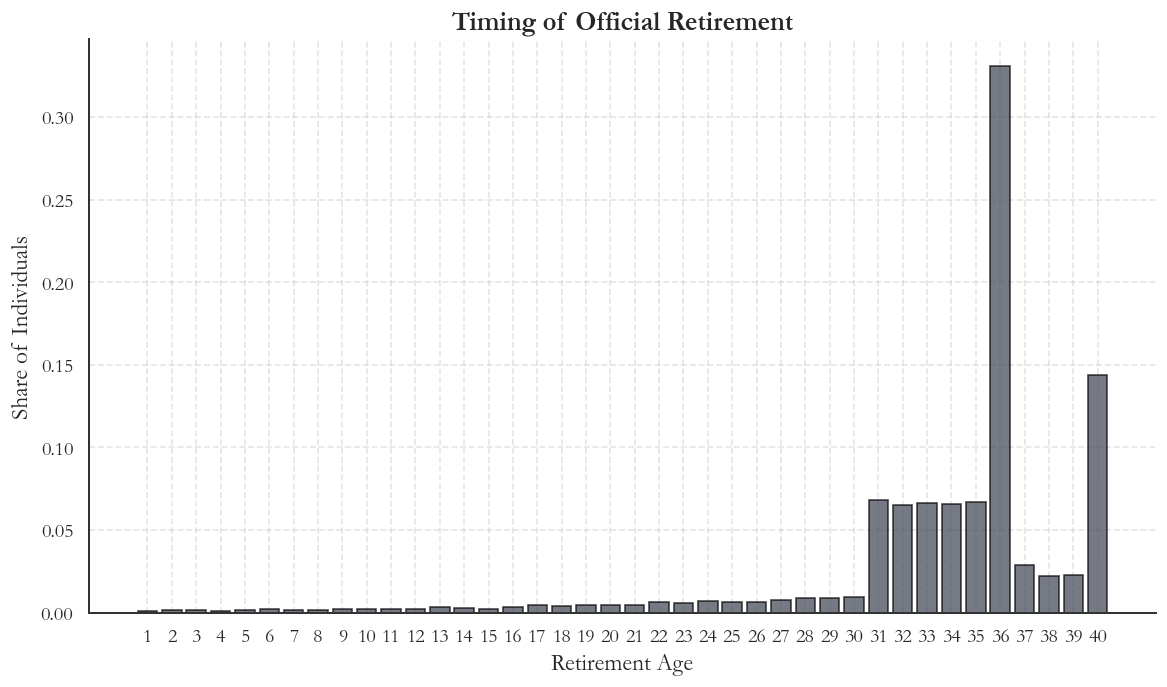

In [12]:
# 1. Find first time e == 2 for each individual
first_retirement = np.full(sim.e.shape[0], np.nan)  # initialize

for i in range(sim.e.shape[0]):
    retired = np.where(sim.e[i, :] == 2)[0]  # find where e=2
    if retired.size > 0:
        first_retirement[i] = retired[0]  # first time they retire
plot_event_bar_series(
    values1=first_retirement,
    xlabel="Retirement Age",
    title="Timing of Official Retirement",
    save_title="baseline_official.png"
)


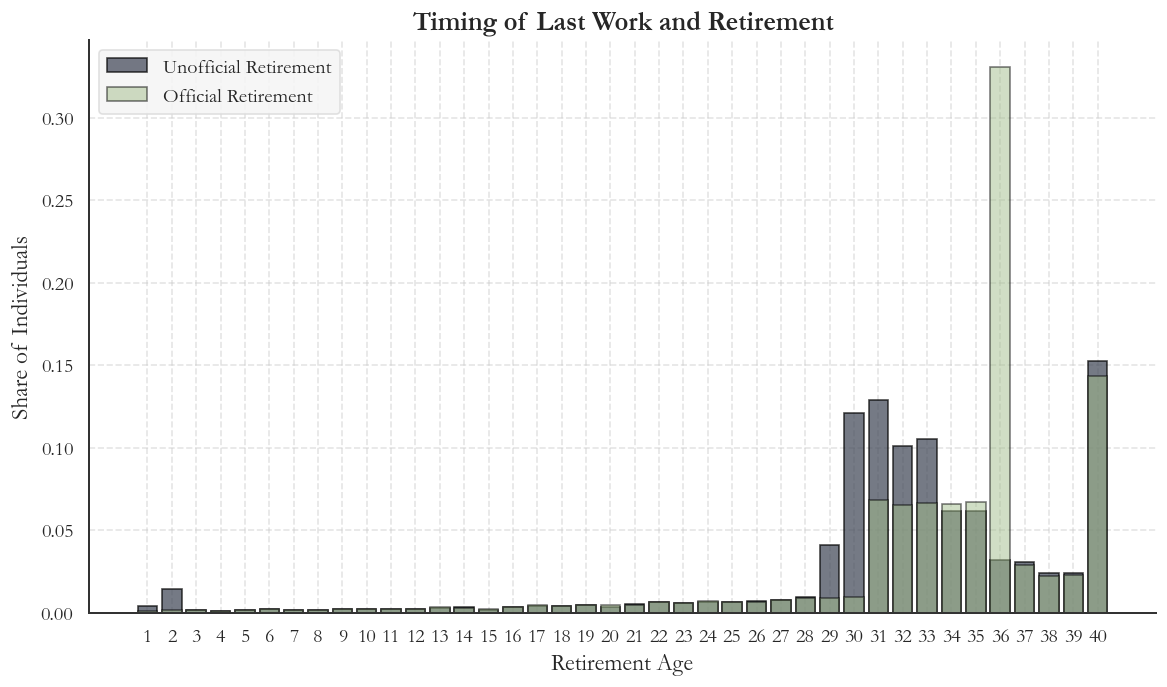

In [13]:
plot_event_bar_series(
    values1=last_working,
    values2=first_retirement,
    xlabel="Retirement Age",
    title="Timing of Last Work and Retirement",
    label1="Unofficial Retirement",
    label2="Official Retirement",
    save_title="baseline_unofficial_official.png"
)


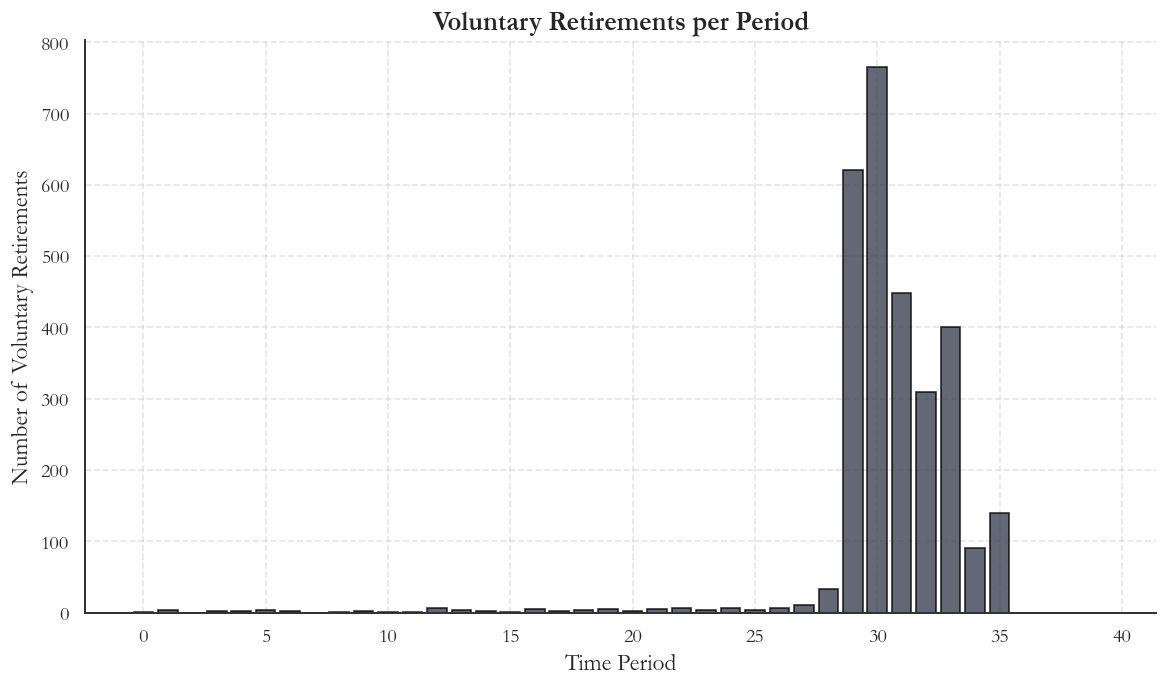

In [14]:
ret_counts = np.sum(model.sim.ret_flag[:, :], axis=0)
plot_bar_series(ret_counts, xlabel="Time Period", ylabel="Number of Voluntary Retirements", title="Voluntary Retirements per Period",
    save_title="baseline_voluntary.png")


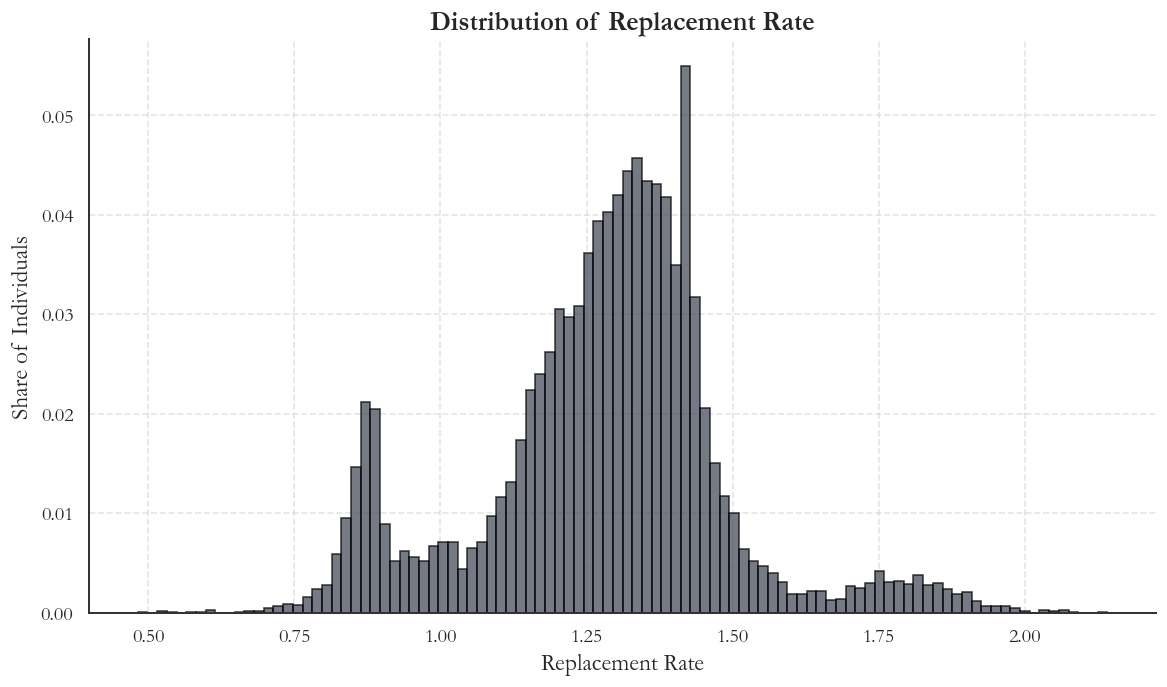

In [15]:
plot_event_histogram(replacement_rate_fct(model), xlabel="Replacement Rate", title="Distribution of Replacement Rate", bins=100,
    save_title="baseline_replacement.png")


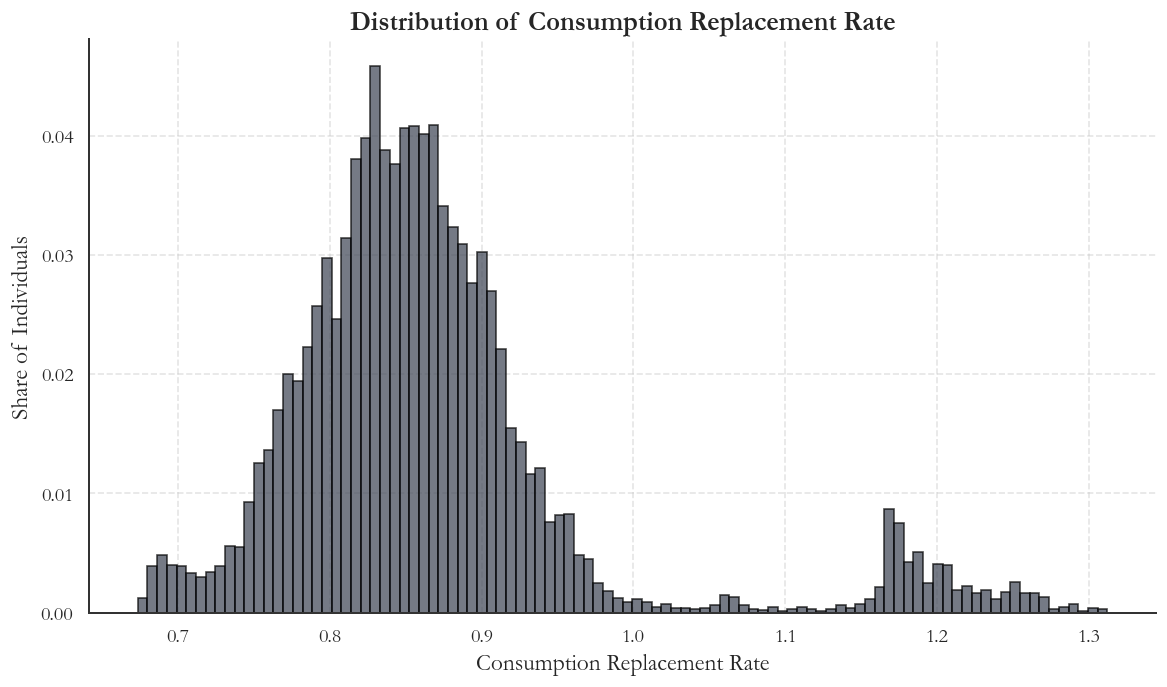

In [16]:
plot_event_histogram(consumption_replacement_rate_fct(model), xlabel="Consumption Replacement Rate", title="Distribution of Consumption Replacement Rate", bins=100,
    save_title="baseline_con_replacement.png")


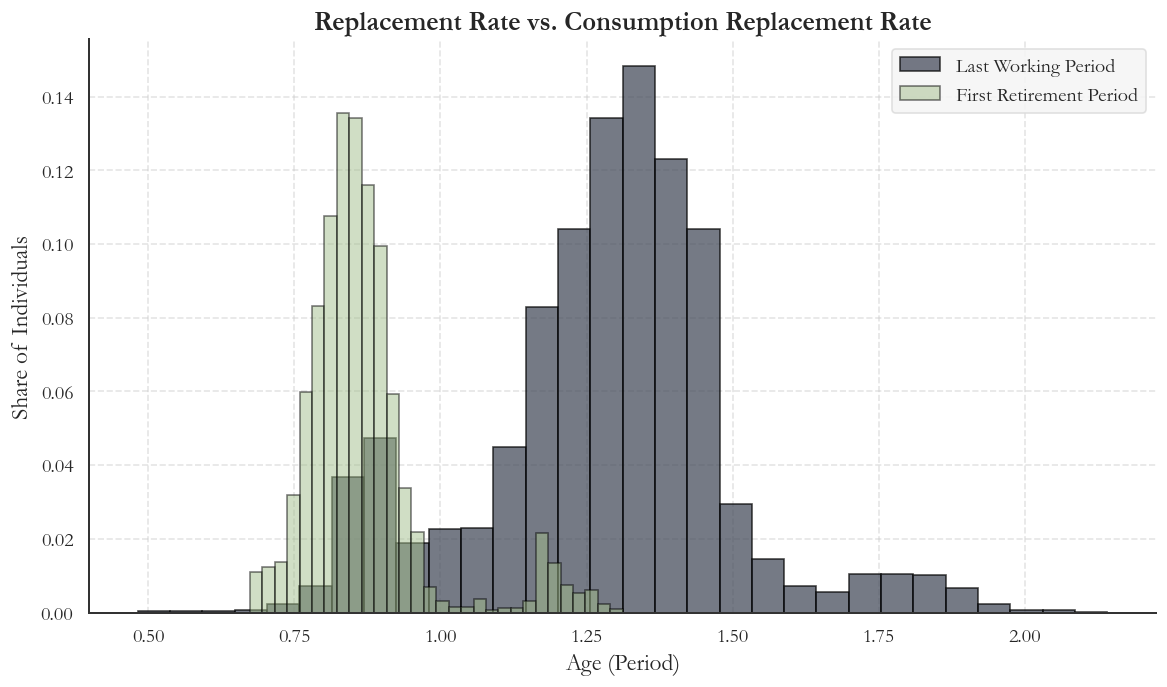

In [17]:
plot_event_histogram(
    values1=replacement_rate_fct(model),
    values2=consumption_replacement_rate_fct(model),
    xlabel="Age (Period)",
    title="Replacement Rate vs. Consumption Replacement Rate",
    label1="Last Working Period",
    label2="First Retirement Period",
    bins=30,
    save_title="baseline_con_and_replacement.png"
)


In [18]:
np.mean(np.sum(model.sim.ret_flag[:,:],axis=1))

np.float64(0.2896)

In [19]:
# To help find nan values
if np.isnan(sim.c).any():
    count = 0 
    list_of_nan = []
    for i in range(sim.c.shape[0]):
        if np.isnan(sim.c[i,35]):
            print(i)
            list_of_nan.append(i)
            count +=1
    # Create a 3x2 grid of subplots
    fig, axes = plt.subplots(6, 2, figsize=(12, 8))

    # Titles for the plots
    titles = [
        "Human Capital (k)", "Wages (w)", "Hours (hours)", 
        "Assets (a)", "Consumption (c)", "Illiquid Savings (s)"
    ]

    t_end = par.T 
    # Generate example data (replace with actual values)
    time = np.arange(t_end)
    for i in list_of_nan[:3]:
        data_dict = {
            "Human Capital (k)": model.sim.k[i,:t_end],
            "Wages (w)": model.sim.w[i,:t_end],
            "Hours (hours)": model.sim.h[i,:t_end],
            "Assets (a)": model.sim.a[i,:t_end],
            "Consumption (c)": model.sim.c[i,:t_end],
            "Illiquid Savings (s)": model.sim.s[i,:t_end],
            "Extensive Margin (ex)": model.sim.ex[i,:t_end],
            "Public benefit (chi)": model.sim.chi_payment[i,:t_end],
            "Tax rate (tax_rate)": model.sim.tax_rate[i,:t_end],
            "Wages after taxes": (1-model.sim.tax_rate[i,:t_end])*model.sim.w[i,:t_end],
            "Early retirement": np.sum([model.sim.e[i,:t_end] == 2.0 for i in range(model.sim.e.shape[0])], axis=0) / model.sim.e.shape[0],
        }
        # Plot each variable in its respective subplot
        for ax, (label, data) in zip(axes.flatten(), data_dict.items()):
            ax.plot(time, data)
            ax.set_title(label)
            ax.set_xlabel("Time Periods")
            ax.set_ylabel("Value")
            ax.grid(True)

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()
    print('Antal der fejler ',count)